In [10]:
import numpy as np
from numpy import random as rnd

In [11]:
# Use dispersity (between 1 and 3) to choose which system to return a radius from

def pickRadius(dispersity):
    if (dispersity == 1):
        return (1/((np.pi)**0.5))
    if (dispersity == 2):
        a = np.array([((3/(2*(np.pi)))**0.5), ((1/(2*(np.pi)))**0.5)])
        return rnd.choice(a , p = [0.5, 0.5])
    if (dispersity == 3):
        a = np.array([((15/(16*(np.pi)))**0.5), ((5/(4*(np.pi)))**0.5)])
        return rnd.choice(a , p = [0.8, 0.2])

In [12]:
#Class for creating a disc
# Cooridinates represent middle of discs
# choose 1-3 for dispersity

class config(): 
    def __init__(self, dispersity):
        self.radius = pickRadius(dispersity)
        self.x = (rnd.rand()) * 20
        self.y = (rnd.rand()) * 20
        return

In [13]:
# iterates attempts of N
#select dispersity scenario of 1-3

def addDiscs(N, dispersity, overlapConstant = 1.0):
    #defines new empty array
    situ = np.array([])
    
    for i in range(N):
        a = config(dispersity)
        #checks if disc is hitting sides
        insideBox = (
            ((a.x - a.radius > 0) and (a.x + a.radius < 20)) 
            and ((a.y - a.radius > 0) and (a.y + a.radius < 20))
        )
        
        # function to apply across array to check if new disc is hitting any exsisting discs
        def notHitting(a2):
            return (((((a.x - a2.x)**2) + ((a.y - a2.y)**2))**0.5) >
                (overlapConstant * (a.radius + a2.radius)))
        applyAll = np.vectorize(notHitting)
        
        #checking hitting any other disc, accounting for its the first disc to be placed
        if (situ.size == 0):
            notHitting = True
        else:
            hittingArray = applyAll(situ)
            notHitting = np.all(hittingArray)
        
        # appends disc to array if it meets conditions
        if (notHitting and insideBox):
            situ = np.append(situ, a)
            
        # Returns completed array after end of loop
    
    # Returns completed array after end of loop
    return situ
        

In [14]:
testArray = addDiscs(10,1)

print(testArray.size)
print(testArray)

9


In [15]:
# defines a class for a new random point on the square
class point(): 
    def __init__(self):
        #defines random x and y coordinates between 0 and 20
        self.x = (rnd.rand()) * 20
        self.y = (rnd.rand()) * 20
        return
    # a function that takes an array of discs and determines if the point is within any radius
    def inAnyCircle(self, discArray):
        for i in discArray: 
            inCircle = ((self.x - i.x)**2 + (self.y - i.y)**2)**0.5 < i.radius
            if (inCircle == True):
                return True
        return False
            
def packingFraction(discArray, NSample):
    validCount = 0
    for i in range(NSample):
        singlePoint = point()
        if (singlePoint.inAnyCircle(discArray) == True):
            validCount += 1
    return validCount / NSample

#need to both regenerate the discs and points every time, so below function is invalid

def averagedPackingFraction(NReps, discArray, NSample):
    fractions = np.array([])
    for i in range(NReps):
        fractions = np.append(fractions, (packingFraction(discArray, NSample)))
    return np.mean(fractions)


In [16]:
packingFraction(testArray, 200)

0.02

In [17]:
def combinedFunction(dispersity, overlapConstant, NParticles, NSample, NRep):
    fractions = np.array([])
    for i in range(NRep):
        discArray = addDiscs(NParticles, dispersity, overlapConstant)
        fractions = np.append(fractions, (packingFraction(discArray, NSample)))
    return np.mean(fractions)
    

In [18]:
combinedFunction(3, 1, 1000, 100, 10)

0.38219999999999993

In [35]:
alphaPlot = np.array([0.4, 0.6, 0.7, 0.8, 0.9, 1.0],[])
for i in range(len(alphaPlot)):
    alphaPlot[i,1] = combinedFunction(1,alphaPlot[0, i],50, 200,10)
print(alphaPlot)



IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

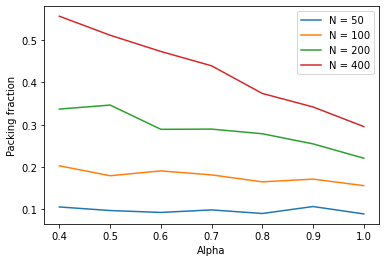

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Set the values for N and alpha
N_values = [50, 100, 200, 400]
alpha_values = np.arange(0.4, 1.1, 0.1)

# Set the value for Nrep and Nsample
Nrep = 10
Nsample = 200

# Initialize a list to store the packing fractions
packing_fractions = []

# Iterate over the values of N
for N in N_values:
    # Initialize a list to store the packing fractions for this value of N
    packing_fractions_N = []

    # Iterate over the values of alpha
    for alpha in alpha_values:
        # Calculate the packing fraction for this value of N and alpha
        f = combinedFunction(1, alpha, N, Nsample, Nrep)

        # Append the packing fraction to the list
        packing_fractions_N.append(f)

    # Append the list of packing fractions for this value of N to the overall list
    packing_fractions.append(packing_fractions_N)

# Plot the packing fraction as a function of alpha for each value of N
for i, N in enumerate(N_values):
    plt.plot(alpha_values, packing_fractions[i], label='N = {}'.format(N))

# Add a legend and labels to the plot
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Packing fraction')

# Show the plot
plt.show()
